# Clustering
The dating profiles

### Importing Libraries and Data

In [84]:
import pandas as pd
pd.set_option('display.max_colwidth', 500)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import _pickle as pickle
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabaz_score, silhouette_score
from sklearn.preprocessing import MinMaxScaler

In [93]:
# Loading in the cleaned DF
with open("profiles.pkl",'rb') as fp:
    df = pickle.load(fp)

# Viewing the DF    
df

,Bios,Movies,TV,Religion,Music,Sports,Books,Politics
0,Typical twitter fanatic. Infuriatingly humble thinker. Lifelong coffee practitioner. Organizer.,5,3,4,1,3,6,7
1,Web junkie. Analyst. Infuriatingly humble introvert. Food nerd. Lifelong music fanatic. Coffee lover.,7,9,5,1,9,4,0
2,Avid web maven. Food practitioner. Gamer. Twitter fanatic. Pop culture scholar. Zombie evangelist.,1,2,6,5,6,5,4
3,Twitteraholic. Extreme web fanatic. Food buff. Infuriatingly humble entrepreneur.,5,2,7,8,2,6,6
4,Bacon enthusiast. Falls down a lot. Freelance social media fan. Infuriatingly humble introvert.,6,6,6,4,3,6,3
5,Pop culture junkie. Tv buff. Reader. Friendly travel expert. Incurable twitteraholic. Social media ninja. Coffee enthusiast. Internet specialist.,0,5,7,5,9,2,0
6,Typical thinker. Amateur explorer. Reader. Extreme student. Tv fanatic. Social media ninja.,5,4,7,5,0,8,4
7,Zombie maven. Travel geek. Professional social media buff. Avid pop culture lover.,9,8,8,2,0,0,5
8,Lifelong introvert. General travel maven. Hipster-friendly web trailblazer. Writer. Alcohol fan. Student. Communicator. Coffee guru.,8,8,2,6,1,2,9
9,Travel ninja. Amateur pop culture evangelist. Web fanatic. Freelance communicator. Zombie geek.,9,0,2,2,5,6,8


## Scaling the Categories

In [95]:
# Instantiating the Scaler
scaler = MinMaxScaler()

# Scaling the categories then replacing the old values
df = df[['Bios']].join(pd.DataFrame(scaler.fit_transform(df.drop('Bios', axis=1)), columns=df.columns[1:], index=df.index))
df

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,Bios,Movies,TV,Religion,Music,Sports,Books,Politics
0,Typical twitter fanatic. Infuriatingly humble thinker. Lifelong coffee practitioner. Organizer.,0.555556,0.333333,0.444444,0.111111,0.333333,0.666667,0.777778
1,Web junkie. Analyst. Infuriatingly humble introvert. Food nerd. Lifelong music fanatic. Coffee lover.,0.777778,1.000000,0.555556,0.111111,1.000000,0.444444,0.000000
2,Avid web maven. Food practitioner. Gamer. Twitter fanatic. Pop culture scholar. Zombie evangelist.,0.111111,0.222222,0.666667,0.555556,0.666667,0.555556,0.444444
3,Twitteraholic. Extreme web fanatic. Food buff. Infuriatingly humble entrepreneur.,0.555556,0.222222,0.777778,0.888889,0.222222,0.666667,0.666667
4,Bacon enthusiast. Falls down a lot. Freelance social media fan. Infuriatingly humble introvert.,0.666667,0.666667,0.666667,0.444444,0.333333,0.666667,0.333333
5,Pop culture junkie. Tv buff. Reader. Friendly travel expert. Incurable twitteraholic. Social media ninja. Coffee enthusiast. Internet specialist.,0.000000,0.555556,0.777778,0.555556,1.000000,0.222222,0.000000
6,Typical thinker. Amateur explorer. Reader. Extreme student. Tv fanatic. Social media ninja.,0.555556,0.444444,0.777778,0.555556,0.000000,0.888889,0.444444
7,Zombie maven. Travel geek. Professional social media buff. Avid pop culture lover.,1.000000,0.888889,0.888889,0.222222,0.000000,0.000000,0.555556
8,Lifelong introvert. General travel maven. Hipster-friendly web trailblazer. Writer. Alcohol fan. Student. Communicator. Coffee guru.,0.888889,0.888889,0.222222,0.666667,0.111111,0.222222,1.000000
9,Travel ninja. Amateur pop culture evangelist. Web fanatic. Freelance communicator. Zombie geek.,1.000000,0.000000,0.222222,0.222222,0.555556,0.666667,0.888889


## Vectorizing the Bios

In [54]:
# Instantiating the Vectorizer
vectorizer = TfidfVectorizer()

# Fitting the vectorizer to the Bios
x = vectorizer.fit_transform(df['Bios'])

In [58]:
df_wrds = pd.DataFrame(x.toarray(), columns=vectorizer.get_feature_names())
df_wrds

,advocate,aficionado,alcohol,alcoholaholic,amateur,analyst,animals,apathy,avid,award,...,unable,unapologetic,wannabe,web,webaholic,winning,with,writer,zombie,zombieaholic
0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.0,0.000000,0.307910,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.238969,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.336385,0.000000,...,0.000000,0.000000,0.000000,0.254821,0.0,0.000000,0.000000,0.000000,0.252230,0.000000
3,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.247144,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.0,0.325846,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.345600,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.259139,0.000000
8,0.000000,0.000000,0.215249,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.213140,0.0,0.000000,0.000000,0.273427,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.0,0.348586,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.259451,0.0,0.000000,0.000000,0.000000,0.256813,0.000000


In [60]:
new_df = pd.concat([df, df_wrds], axis=1)
new_df.drop('Bios', axis=1, inplace=True)

In [61]:
new_df

,Movies,TV,Religion,Music,Sports,Books,Politics,advocate,aficionado,alcohol,...,unable,unapologetic,wannabe,web,webaholic,winning,with,writer,zombie,zombieaholic
0,5,3,4,1,3,6,7,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
1,7,9,5,1,9,4,0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.238969,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
2,1,2,6,5,6,5,4,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.254821,0.0,0.000000,0.000000,0.000000,0.252230,0.000000
3,5,2,7,8,2,6,6,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.247144,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
4,6,6,6,4,3,6,3,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
5,0,5,7,5,9,2,0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
6,5,4,7,5,0,8,4,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
7,9,8,8,2,0,0,5,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.259139,0.000000
8,8,8,2,6,1,2,9,0.000000,0.000000,0.215249,...,0.000000,0.000000,0.000000,0.213140,0.0,0.000000,0.000000,0.273427,0.000000,0.000000
9,9,0,2,2,5,6,8,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.259451,0.0,0.000000,0.000000,0.000000,0.256813,0.000000


## KMeans

In [33]:
k_means = KMeans(n_clusters=10)

In [62]:
k_means.fit(new_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [64]:
cluster_assignments = k_means.predict(new_df)

In [66]:
print(calinski_harabaz_score(new_df, cluster_assignments))

485.7583031756363


### Finding Optimum Number of Clusters

In [80]:
cluster_cnt = [i for i in range(2, 20, 2)]

ch_scores = []

s_score = []

for i in cluster_cnt:
    k_means = KMeans(n_clusters=i)
    
    k_means.fit(new_df)
    
    cluster_assignments = k_means.predict(new_df)
    
    ch_scores.append(calinski_harabaz_score(new_df, cluster_assignments))
    
    s_score.append(silhouette_score(new_df, cluster_assignments))

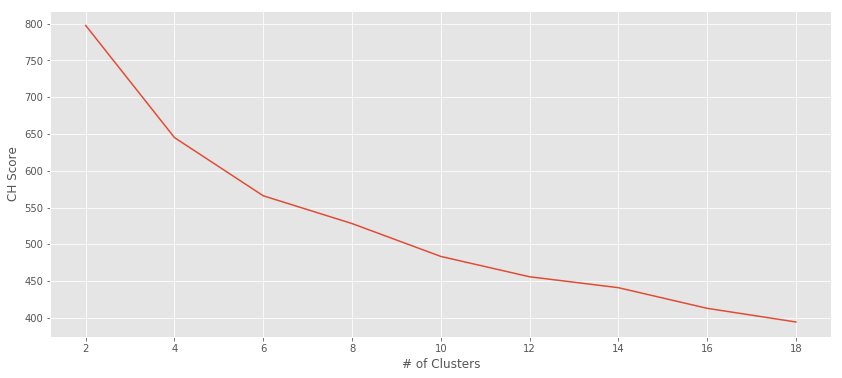

In [81]:
x = cluster_cnt
y = ch_scores

plt.figure(figsize=(14,6))
plt.style.use('ggplot')
plt.plot(x,y)
plt.xlabel('# of Clusters')
plt.ylabel('CH Score')
plt.show()

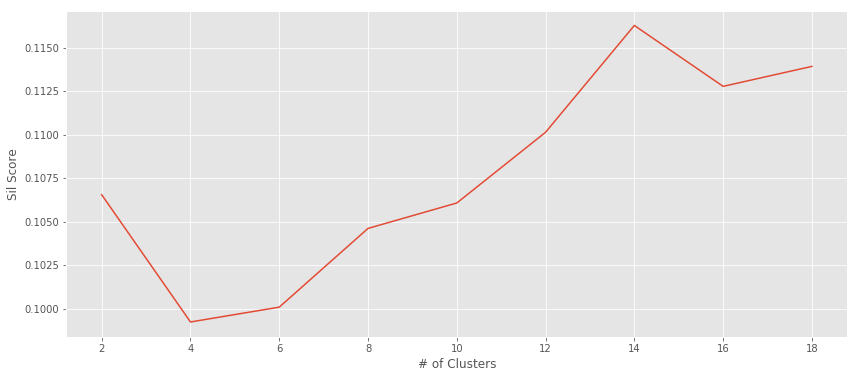

In [83]:
x = cluster_cnt
y = s_score

plt.figure(figsize=(14,6))
plt.style.use('ggplot')
plt.plot(x,y)
plt.xlabel('# of Clusters')
plt.ylabel('Sil Score')
plt.show()